# Figures for theory and methods section 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from activation_functions import *
from plotting import make_plot

In [6]:
# leaky relu with exaggerated delta
def LRELU(X):
    delta = 10e-2
    return np.where(X > np.zeros(X.shape), X, delta * X)

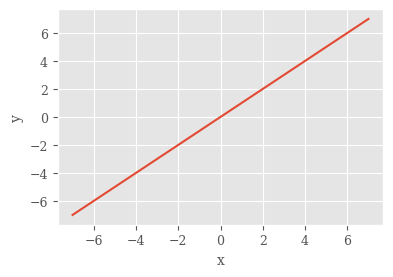

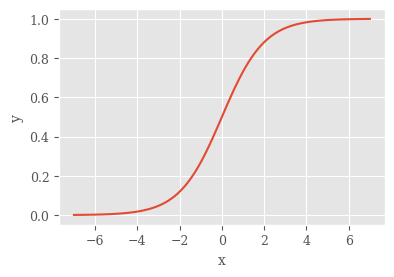

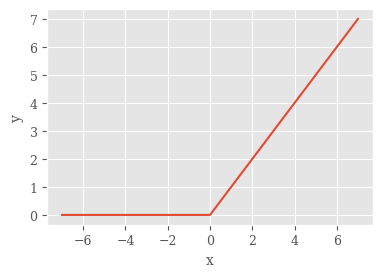

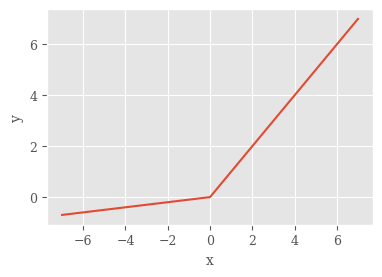

In [7]:
x = np.linspace(-7,7,101)

functions = {
    "Identity": identity(x),
    "Sigmoid": sigmoid(x),
    "ReLU": RELU(x),
    "Leaky ReLU": LRELU(x)
}

for name, values in functions.items():
    fig, _ = make_plot('standard')

    plt.plot(x, values)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.savefig(f"../figures/theory/{name}.pdf")
    plt.show()

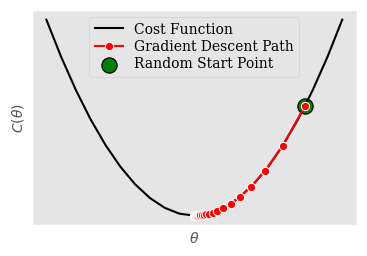

In [8]:
from numpy import asarray, arange
from numpy.random import rand, seed

def objective(x): return x**2
def derivative(x): return x * 2

def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    solutions, scores = [], []
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    for _ in range(n_iter):
        gradient = derivative(solution)
        solution -= step_size * gradient
        solutions.append(solution[0])  # Store scalar value
        scores.append(objective(solution[0]))
    return solutions, scores

seed(4)
bounds = asarray([[-1.0, 1.0]])
solutions, scores = gradient_descent(objective, derivative, bounds, 30, 0.1)
inputs = arange(bounds[0, 0], bounds[0, 1] + 0.1, 0.1)
results = objective(inputs)

fig, _ = make_plot('standard')

sns.lineplot(x=inputs, y=results, color = "black", label="Cost Function")
sns.lineplot(x=solutions, y=scores, marker="o", color="red", label="Gradient Descent Path")
sns.scatterplot(x=[solutions[0]], y=[scores[0]], color="green", s=120, label="Random Start Point", marker="o", edgecolor="black")
plt.xticks([])
plt.yticks([])
plt.ylabel('$C(\\theta)$')
plt.xlabel('$\\theta$')
plt.show()